Visualizing Datasets
=============

At the end of the day, any scientific experiment -- either performed in the lab, or _in silico_ -- tends to produce data which is processed and analyzed. Sometimes, this analysis involves [visualizing the data](https://en.wikipedia.org/wiki/Data_visualization). In this lesson, you'll learn how to use Python's ``matplotlib`` package to make some visualizations.

In this lesson, we'll be working with some data derived from a [data set](http://databank.worldbank.org/data/reports.aspx?source=2&series=EN.ATM.CO2E.PC) published by the World Bank on carbon dixoide emissions by country and year, measured in metric tons per capita.



Python Basics
==========

Because this lesson uses Python, and it's the first of the workshop, we need to take a little bit of time to explain some basics of programming in Python. A more detailed lesson is available through [Software Carpentry](http://swcarpentry.github.io/python-novice-inflammation/).

* Importing Python Packages

Generally speaking, to import a package ``foo``, you use ``import foo``. Here, we'll work with the ``numpy`` package (aka, _numerical Python_).

In [1]:
import numpy

However, you may wish to use a different name for the package when you call it. (This is especially useful for packages with longer names!) Thankfully, Python import statements support this kind of renaming, using ``import foo as bar``:

In [2]:
import numpy as np

You may also want to import _specific_ functions only, without pulling in the entire package. You can do so using ``from foo import bar``:

In [3]:
from numpy import linalg

Now we have access to only functions declared in the ``linalg`` module within ``numpy``.

* Commenting code

Few-line comments in Python are preceded by a pound sign:

In [4]:
#My awesome comment
import numpy

For multi-line comments, use ''' to start the comment, and ''' to close it:

In [5]:
'''Some multi-line comment
is going to go here.'''
import numpy

* Assigning variable names

Variables in Python are declared and _typed_ dynamically. That is, if I want to create a variable ``height``, and assign it a value of 10, I do

In [8]:
height = 10.0

I can check the _type_ of height using the ``type()`` function:

In [9]:
type(height)

float

We can also do arithmetic and other mathematical operations:

In [10]:
height * 2

20.0

In [11]:
height / 5

2.0

In [12]:
twice_as_high = 2 * height

If we check the value of ``twice_as_high``, it will be two times that of ``height``:

In [13]:
twice_as_high

20.0

Suppose we change ``height`` to be 40. What value do you think ``twice_as_high`` will have?

In [14]:
height = 40

In [15]:
twice_as_high

20.0

Python variables are not updated dynamically. However, repeated assignments to the same variable name _do_ update its value!

In [17]:
twice_as_high = 2 * height

In [18]:
twice_as_high

80

* Writing loops

Very often, we need to write a loop of some kind to repeat an action.

Anatomy of a Matplotlib Figure
==============

Now that you are comfortable with using Python, let's take a look at one of the main tools used to do data visualization in Python: [matplotlib](https://matplotlib.org/index.html). ``matplotlib`` is designed to be Python's answer to plotting in ``MATLAB``. For this reason, if you've had to make plots in ``MATLAB``, you might find working with ``matplotlib`` to be somewhat familiar.

Generally speaking, people interact with ``matplotlib`` in one of two ways:

* They import a module, ``matplotlib.pyplot``, which exposes a whole bunch of plotting functions, and allows for more fine-tuned control over aspects of the plot

* They import a module ``pylab``, which itself imports ``matplotlib`` and some other Python packages, to make the generation of plots a bit more like how ``MATLAB`` works.

For the purposes of this lesson, you will be using the former approach, as ``matplotlib.pyplot`` provides a much more rich set of commands with which you can create plots. (For more of a discussion on this point, see this [blog post from DataCamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python).)

Ready to start making some plots?



> The ``matplotlib.pyplot`` ``figure`` object
------------------

The first thing you need to know about making a plot is the ``figure`` object. Think of it like a canvas that an artist paints on - it's a blank slate upon which you can put text, images, etc. The ``figure`` object is the fundamental thing we need to do plotting.

Let's import ``matplotlib.pyplot`` and instantiate a figure. To do so, we first need to import the module. In addition, because we are working in a Jupyter notebook, it's often convenient to tell matplotlib that we want the plots to be rendered "inline" inside the notebook.

In [19]:
#Import matplotlib, and set rendering to be "inline"
import matplotlib.pyplot as plt

%matplotlib inline

#Import numpy for later in the notebook
import numpy as np

Now, we can instantiate a ``figure``.

In [20]:
#Instantiate a figure, and show it
fig = plt.figure()

plt.show()

Hmm...that's interesting! We made a figure, but when we show it, we simply get a memory address! Why is that? Because, since the figure is a _canvas_, and we haven't put anything on it, there's nothing to show! 

> Adding axes to the figure
------------

Having instantiated a ``figure`` object, we can use the ``.add_axes()`` method to put axes on the figure.

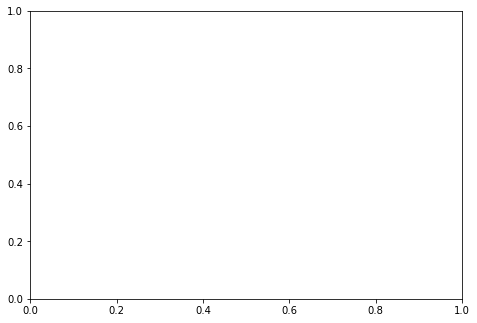

In [23]:
#Instantiate a figure, and add a standard set of axes
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

plt.show()

The ``add_axes()`` method provides us with a non-trivial degree of control over the figure. For example, suppose we wanted to put two sets of axes. To do so, we call ``add_axes()`` twice.

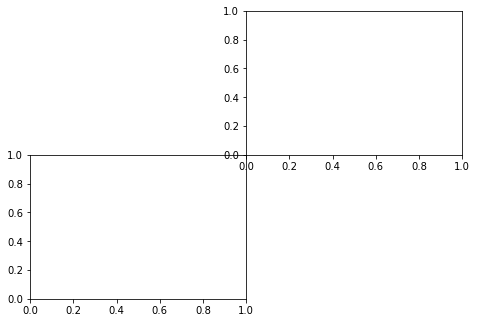

In [29]:
#Instantiate a figure
fig = plt.figure()

#Add an axis for the left half of the figure
ax = fig.add_axes([0, 0, .5, .5])

#Add an axis for the right half of the figure
ax2 = fig.add_axes([.5, .5, .5, .5])


Now that we can add axes to our figures, we can start making some plots!

Some Simple Plots
============

> Line Plot
-----------

One of the most basic -- but useful -- plots is a _line plot_. If we have an ``Axes`` object, we can use its ``plot`` method to plot data. Below, you will take some data about historical US CO2 emissions, and make a line plot.

In [30]:
#Data derived from the World Bank data set

years = [1990, 2000, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

us_emissions = [np.round(float(x), 2) for x in ['19.3233681671961', '20.2076147591466', '19.2374604467856',
       '18.4892337521751', '17.1923671443447', '17.4848031479796',
       '17.0194385160343', '16.28705288144', '16.389757994879']]

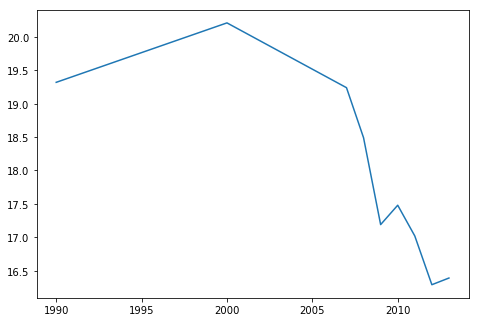

In [31]:
#Instantiate a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0,0,1,1])

#Plot emissions versus years
ax.plot(years, us_emissions)

This is a pretty minimal plot. There are several things we might like to do to it, to make it a bit more legible:

* Put markers at the data points
* Make the line dashed, so that people don't think there's X-values in-between the integers
* Add labels to the x,y-axes
* Add a title

Using the ``plot`` method of an ``Axes`` object, doing so is straightforward! The first two points are accomplished using the ``marker``, ``markersize``, ``linestyle`` keywords, and the last two using other methods built into the ``Axes`` object.

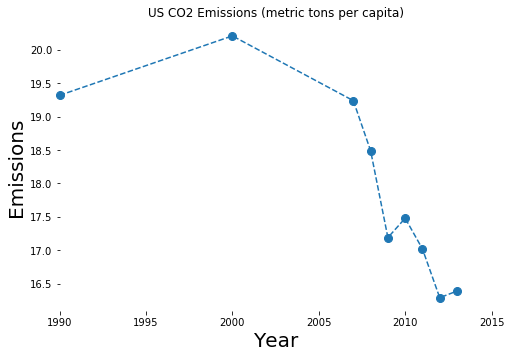

In [37]:
#Draw the minimal figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

#Change marker, markersize, and linestyle
ax.plot(years, us_emissions, marker='o', markersize=8, linestyle='--', clip_on=False)

#Add a label to the x-axis
ax.set_xlabel('Year', fontsize=20)

#Add a label to the y-axis
ax.set_ylabel('Emissions', fontsize=20)

#Add a  title
ax.set_title('US CO2 Emissions (metric tons per capita)')

#Adjust x limits for easier viewing
ax.set_xlim([1990, 2015])

#Turn off the frame (the box around the plot)
ax.set_frame_on(False)

> Bar Plot
-----------

To make a bar plot, we use the ``bar`` method of an ``Axes`` object. Below, you'll make a bar plot of carbon dioxide emissions in 2012 for a few countries.

The ``bar`` method is a bit strange in that it request as input a list of scalars and a list of bar heights, and
then outputs the bar plot. Which means that if we want our x-labels to be _categorical_, then we need to explicitly
manipulate the plot to do so.

In [38]:
#2012 carbon dioxide emissions (metric tons per capita) for a few countries

countries = ['Qatar', 'Kuwait', 'Luxembourg', 'United Arab Emirates', 'Saudi Arabia', 'Australia', 'United States',\
             'Canada', 'Russian Federation']

emissions = [46.697477, 29.578729, 20.084219, 19.252223, 19.188937, 16.519386, 16.287053, 13.858827, 12.818345]

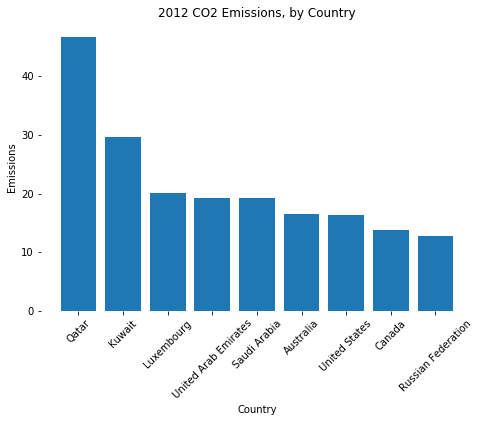

In [47]:
#Make a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0, 0, 1, 1])

#Use the bar() function to make the bar plot
ax.bar(range(len(countries)), emissions)

#Adjust the x-ticks
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=45)

#Put labels on the axes, and make a title
ax.set_xlabel('Country')
ax.set_ylabel('Emissions')
ax.set_title('2012 CO2 Emissions, by Country')

#Turn off the frame
ax.set_frame_on(False)
#Suppress some output, and show the plot
plt.show()

> Histogram
-----------

Another useful visualization is a histogram. We can make one using the ``hist()`` method of an ``Axes`` object. Below, we expand our view of the emissions information we plotted above, and look at 2012 CO2 emissions over all countries for which the World Bank had information.

In [49]:
#Load 2012 data from the data file
emissions = np.loadtxt('2012_emissions_data.txt')

As a sanity check, let's see how many entries are in this dataset:

In [50]:
len(emissions)

204

There are approximately 195 recognized countries in the world today, so this number is in the right ballpark. (It may include other sovereign entities which are not countries.)

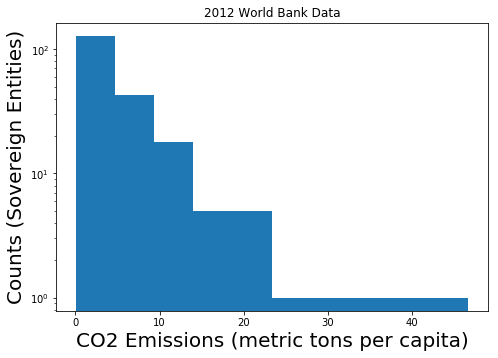

In [55]:
#Make a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0, 0, 1, 1])

#Use the ax.hist() function to make a histogram.
#NOTE: Adjust the range if need be.
ax.hist(emissions)

#Label the axes
ax.set_xlabel('CO2 Emissions (metric tons per capita)', fontsize=20)
ax.set_ylabel('Counts (Sovereign Entities)', fontsize=20)
ax.set_title('2012 World Bank Data')
#Change the y-scale to make the visualization a bit
#easier to understand.
ax.set_yscale('log')

plt.show()

Working with Multiple ``Axes`` Objects
==========

The plots above all use a single ``Axes`` object to do plotting. However, we may want to make many different kinds of plots, all of which are related to one another, and display them on the same figure. How can we do so? ``matplotlib`` provides at least two ways:

* Use the ``figure.add_subplot()`` method, which is useful for figures where you want to arrange the different plots in a _rectangular grid_

* Use the ``matplotlib.gridspec()`` module, which provides more fine-grained control over the grid than the ``figure.add_subplot()`` method.

We'll look at both of these approaches.

> Using the ``figure.add_subplot()`` method
----------

This method is well-suited to quickly setting up rectangular grids of axes. For example, what if we wanted to make histograms for several different years? Using ``.add_subplot()`` is a natural choice for doing so.

To use this method, we first instantiate a ``figure`` object, and then specify the number of rows, number of columns, and tell matplotlib where to put the axes:

```python
fig = plt.figure()
ax = fig.add_subplot(nrows, ncolumns, counter)
```

``counter`` has to take values in the interval [1, 2, 3, ..., ``nrows``*``ncolumns``].

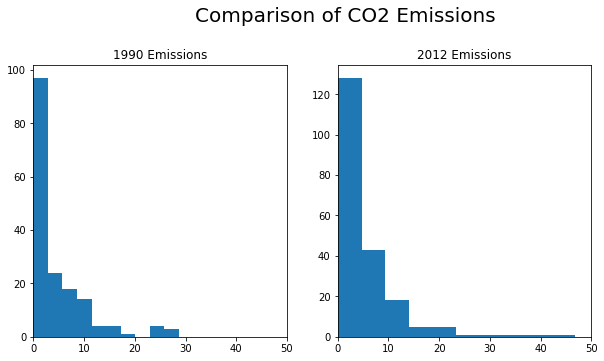

In [65]:
#Create the figure
fig = plt.figure(figsize=(10, 5))

#Make a subplot with 1 row, 2 columns, and put this
#axis in the first position
ax1 = fig.add_subplot(1, 2, 1)

#Load the 1990 emissions data
emissions_1990 = np.loadtxt('1990_emissions_data.txt')

#Make a histogram
ax1.hist(emissions_1990)

#Set the xlimits, title, y-scale
ax1.set_xlim([0, 50])
ax1.set_title('1990 Emissions')

#Continue the subplot from above, but increment the counter
#by one
ax2 = fig.add_subplot(1, 2, 2)

#Load the 2012 emissions data
emissions_2012 = np.loadtxt('2012_emissions_data.txt')

#Make a histogram
ax2.hist(emissions_2012)


#Set the xlimits, title, y-scale
ax2.set_xlim([0, 50])
ax2.set_title('2012 Emissions')

#Make a figure-level title using the fig.text() function
#May have to adjust the (x,y) coordinates
fig.text(.35, 1, 'Comparison of CO2 Emissions', fontsize=20)
plt.show()

> Using the ``matplotlib.gridspec`` module
----------

The ``gridspec`` module is useful if you have several things you want to plot, but the arrangement of the plots is a bit more involved. To demonstrate this, we'll make a plot with the following components:

* A bar plot of emissions from the US and China in 2013
* A time series plot of US emissions
* A time series plot of Chinese emissions

To make this plot, we also utilize the ``pandas`` package, which is designed to be Python's answer to the R statistical programming language. For the purposes of this lesson, we won't focus too much on exactly how dataframes work.

In [66]:
#Import pandas
import pandas as pd

#Import the GridSpec module from matplotlib.gridspec
from matplotlib.gridspec import GridSpec


In [73]:
#Read a CSV file
#for US/Chinese emissions
df = pd.read_csv('us_china_emissions.csv')

In [72]:
#Look at the start of the data
df.head()

,Country Name,Year,emissions
0,China,1990,2.168
1,United States,1990,19.323
2,China,2000,2.697
3,United States,2000,20.208
4,China,2007,5.154


Now that we have the data, we create a [``GridSpec`` object](https://matplotlib.org/users/gridspec.html). Like the ``add_subplot()`` method, we need to specify the number of rows and columns.

The geometry of the plot we are going to make will look like one two-column plot at the top, and two one-column plots on the bottom. Thus, we will need two rows and two columns.

In [69]:
#Create a GridSpec object, with 2 rows and 2 columns
grid = GridSpec(2, 2)

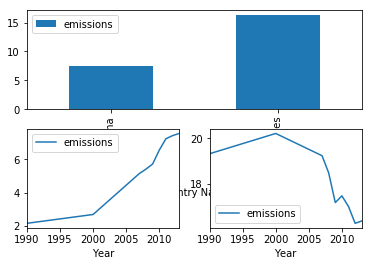

In [79]:
#Make the figure
fig = plt.figure()

#To create the top-most plot, we tell
#the figure the subplot spans two columns
ax1 = fig.add_subplot(grid[0, :])

#Specify which year we want to look at
year = 2012

#Now, we use the .plot() method of pandas dataframes to plot emissions
#for US and China
df[df['Year'] == year].plot(x='Country Name', y='emissions', ax=ax1, kind='bar')

#Set the title to tell us what year we're looking at


#To create the bottom-left plot,
#we tell the figure to use the [1, 0]
#element of the grid.
ax2 = fig.add_subplot(grid[1, 0])

#Plot a time series of Chinese emissions
df[df['Country Name'] == 'China'].plot(x='Year', y='emissions', ax=ax2)


#To create the bottom-right plot,
#we tell the figure to use the [1, 1]
#element of the grid.
ax3 = fig.add_subplot(grid[1, 1])

#Plot a time series of US emissions
df[df['Country Name'] == 'United States'].plot(x='Year', y='emissions', ax=ax3)

Improving Figure Aesthetics
==============

> Using ``seaborn`` to change default aesthetics
-------------
(Explain ``import seaborn``, and how it overrides ``matplotlib`` defaults)

In [1]:
import seaborn

In [2]:
seaborn.__version__

'0.7.1'

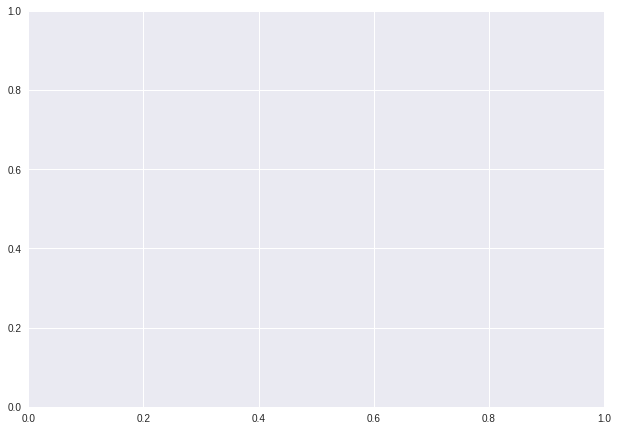

In [30]:
fig = plt.figure()
ax= fig.add_axes([0, 0, 1, 1])

> Choosing a Good Colormap with ``seaborn.color_palette``
--------------
http://seaborn.pydata.org/tutorial/color_palettes.html

* Categorical Data

In [31]:
df = pd.read_csv('worldwide_emissions.csv')

df.head()

,Country Name,Year,emissions
0,China,1990,2.168
1,France,1990,6.420
2,Japan,1990,8.873
3,"Korea, Rep.",1990,5.760
4,United States,1990,19.323


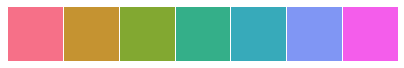

In [32]:
colors = seaborn.color_palette('husl', n_colors=len(df['Country Name'].unique()))

seaborn.palplot(colors)

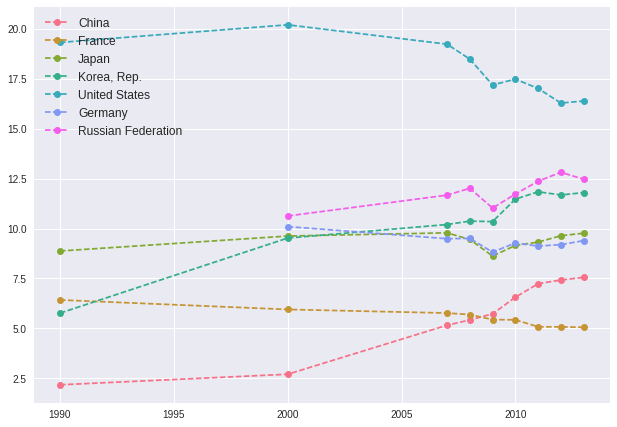

In [33]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

counter = 0
for c in df['Country Name'].unique():
    X = df[df['Country Name'] == c]['Year']
    Y = df[df['Country Name'] == c]['emissions']
    ax.plot(X, Y, color=colors[counter], ls='--', marker='o', clip_on=False, label=c)
    
    counter +=1
    
ax.legend(loc=0, fontsize=12)

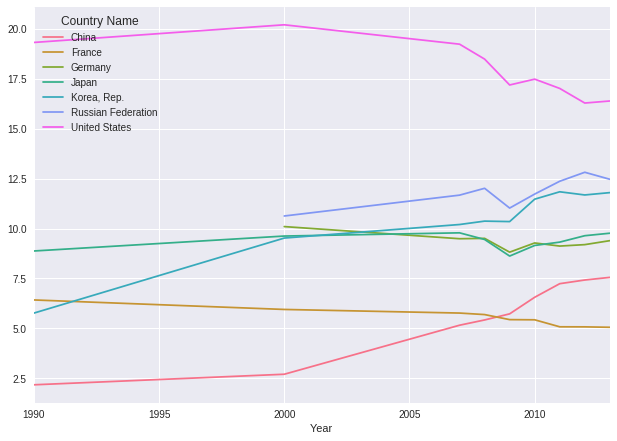

In [34]:

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
df.pivot_table(index='Year', columns='Country Name', values='emissions').plot(ax=ax,color=colors)

* Sequential Color Palette

In [35]:
PT = df.pivot_table(index='Year', columns='Country Name', values='emissions').transpose()
PT

Year,1990,2000,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,
China,2.168,2.697,5.154,5.417,5.723,6.554,7.235,7.419,7.551
France,6.420,5.944,5.763,5.687,5.434,5.425,5.074,5.071,5.050
Germany,NaN,10.096,9.488,9.506,8.815,9.276,9.120,9.192,9.391
Japan,8.873,9.622,9.783,9.450,8.619,9.150,9.318,9.639,9.764
"Korea, Rep.",5.760,9.521,10.200,10.370,10.347,11.470,11.840,11.681,11.798
Russian Federation,NaN,10.627,11.672,12.015,11.024,11.726,12.368,12.818,12.467
United States,19.323,20.208,19.237,18.489,17.192,17.485,17.019,16.287,16.390


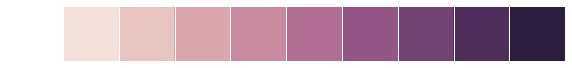

In [36]:
cmap = seaborn.cubehelix_palette(n_colors=10, light=1, as_cmap=False)
seaborn.palplot(cmap)

In [37]:
cmap = seaborn.cubehelix_palette(n_colors=10, light=1, as_cmap=True)

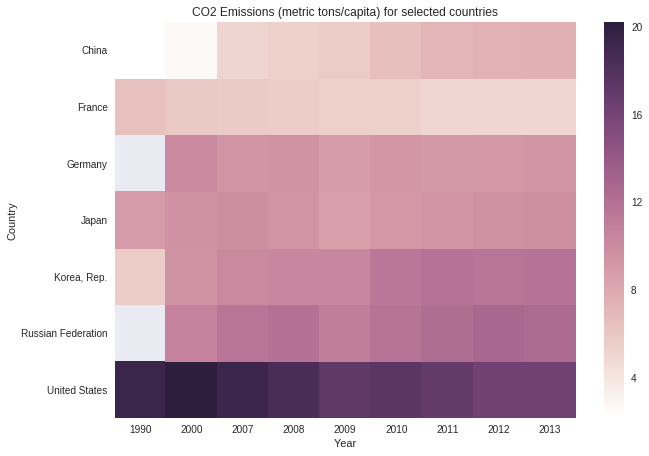

In [38]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
seaborn.heatmap(PT.as_matrix(), ax=ax, cmap=cmap)

ax.set_xticklabels(PT.columns)
ax.set_yticklabels(list(reversed(PT.index)), rotation=0)

ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_title('CO2 Emissions (metric tons/capita) for selected countries')
plt.show()

* Diverging Colormap

In [39]:
sub_country = 'Japan'

sub_df = PT.sub(PT.ix[sub_country, :], axis=1)

sub_df

Year,1990,2000,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,
China,-6.705,-6.925,-4.629,-4.033,-2.896,-2.596,-2.083,-2.220,-2.213
France,-2.453,-3.678,-4.020,-3.763,-3.185,-3.725,-4.244,-4.568,-4.714
Germany,NaN,0.474,-0.295,0.056,0.196,0.126,-0.198,-0.447,-0.373
Japan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"Korea, Rep.",-3.113,-0.101,0.417,0.920,1.728,2.320,2.522,2.042,2.034
Russian Federation,NaN,1.005,1.889,2.565,2.405,2.576,3.050,3.179,2.703
United States,10.450,10.586,9.454,9.039,8.573,8.335,7.701,6.648,6.626


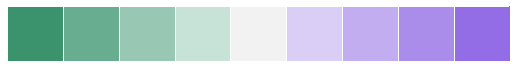

In [40]:
colors = seaborn.diverging_palette(150, 275, s=80, l=55, n=9)

seaborn.palplot(colors)

cmap = seaborn.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

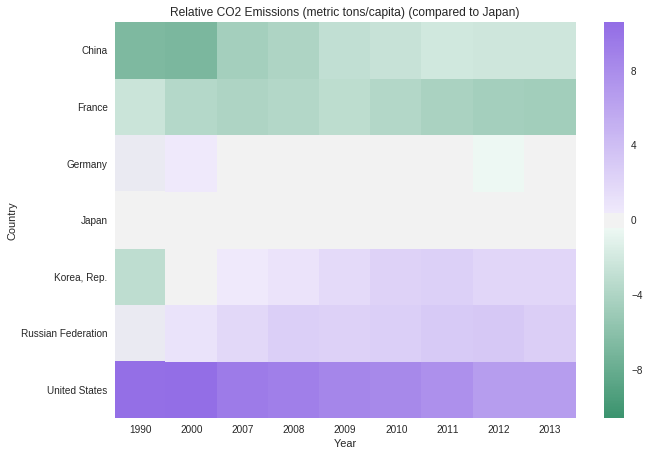

In [41]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
seaborn.heatmap(sub_df.as_matrix(), ax=ax, cmap=cmap)

ax.set_xticklabels(sub_df.columns)
ax.set_yticklabels(list(reversed(sub_df.index)), rotation=0)

ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_title('Relative CO2 Emissions (metric tons/capita) (compared to {0})'.format(sub_country))
plt.show()

> Using LaTeX-style fonts
-----------------

Fix error
==

In [42]:
import matplotlib as mpl
#Change "False" -> "True" to have matplotlib render
#the text in the plots with a LaTeX-like font
mpl.rc('text', usetex=False)

ValueError: x and y must have same first dimension, but have shapes (2,) and (9,)

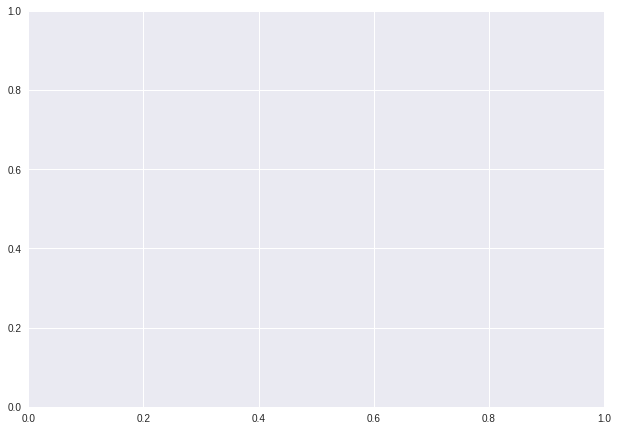

In [43]:
#Instantiate a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0, 0, 1, 1])


#Plot emissions versus years
ax.plot(years, us_emissions)

> Generating Useful Plots with ``seaborn``
-------------

* Bar Plot

In [ ]:
df = pd.read_csv('worldwide_emissions.csv')

df.head()

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
seaborn.barplot(x='Year', y='emissions', data=df, hue='Country Name', ax=ax)

In [ ]:
df = pd.read_table('2012_emissions_data.txt', header=None)

df.head()

In [ ]:
seaborn.distplot(df, kde=True)

In [ ]:
seaborn.violinplot(data=df)

Sharing Your Figures
==========

> Choosing a Good File Format
--------------

* pdf
* svg
* png

> Saving Figures with ``figure.savefig()``
------------

In [ ]:
df = pd.read_csv('worldwide_emissions.csv')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
seaborn.barplot(x='Year', y='emissions', data=df, hue='Country Name', ax=ax)

fig.savefig('emissions.png', bbox_inches='tight')